In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Reading the dataset of amazon i.e required
df = pd.read_csv('amazon_alexa.csv')



In [2]:
df

,Unnamed: 0,rating,date,variation,verified_reviews,feedback
0,0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...,...
3145,3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        3150 non-null   int64 
 1   rating            3150 non-null   int64 
 2   date              3150 non-null   object
 3   variation         3150 non-null   object
 4   verified_reviews  3150 non-null   object
 5   feedback          3150 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 147.8+ KB


In [4]:
df.shape,df.columns

((3150, 6),
 Index(['Unnamed: 0', 'rating', 'date', 'variation', 'verified_reviews',
        'feedback'],
       dtype='object'))

In [5]:
df.isnull().sum()

Unnamed: 0          0
rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.dtypes

Unnamed: 0           int64
rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
dtype: object

In [8]:
from jupyterthemes import get_themes
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('monokai')

In [9]:

# Rename a single column
df.rename(columns={'Unnamed: 0': 'id'}, inplace=True)

In [10]:
df

,id,rating,date,variation,verified_reviews,feedback
0,0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...,...
3145,3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [11]:
df.drop("id",axis=1,inplace=True)


In [12]:
df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [22]:
num_colmn=df.dtypes[df.dtypes!="object"].index
num_colmn

Index(['rating', 'feedback'], dtype='object')

In [24]:
cat_colmn=df.dtypes[df.dtypes=="object"].index
cat_colmn

Index(['date', 'variation', 'verified_reviews'], dtype='object')

In [25]:
df[cat_colmn].head()

,date,variation,verified_reviews
0,31-Jul-18,Charcoal Fabric,Love my Echo!
1,31-Jul-18,Charcoal Fabric,Loved it!
2,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer..."
3,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...
4,31-Jul-18,Charcoal Fabric,Music


In [26]:
df[num_colmn].head()

,rating,feedback
0,5,1
1,5,1
2,4,1
3,5,1
4,5,1


In [28]:
for i in cat_colmn:
    print(df[i].value_counts())

30-Jul-18    1603
29-Jul-18     482
28-Jul-18     250
26-Jul-18      85
31-Jul-18      81
             ... 
2-Jun-18        2
9-Jun-18        1
29-May-18       1
4-Jun-18        1
13-Jun-18       1
Name: date, Length: 77, dtype: int64
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64
                                                                                                                                                               

In [29]:
df_dummies=pd.get_dummies(df,columns=cat_colmn[:-1])
df_dummies

,rating,verified_reviews,feedback,date_1-Jul-18,date_1-Jun-18,date_10-Jul-18,date_10-Jun-18,date_11-Jul-18,date_11-Jun-18,date_12-Jul-18,...,variation_Configuration: Fire TV Stick,variation_Heather Gray Fabric,variation_Oak Finish,variation_Sandstone Fabric,variation_Walnut Finish,variation_White,variation_White Dot,variation_White Plus,variation_White Show,variation_White Spot
0,5,Love my Echo!,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,Loved it!,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,5,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Music,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,5,"Perfect for kids, adults and everyone in betwe...",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,5,"Listening to music, searching locations, check...",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,5,"I do love these things, i have them running my...",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,5,Only complaint I have is that the sound qualit...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [30]:
df_dummies.dtypes

rating                    int64
verified_reviews         object
feedback                  int64
date_1-Jul-18             uint8
date_1-Jun-18             uint8
                          ...  
variation_White           uint8
variation_White  Dot      uint8
variation_White  Plus     uint8
variation_White  Show     uint8
variation_White  Spot     uint8
Length: 96, dtype: object

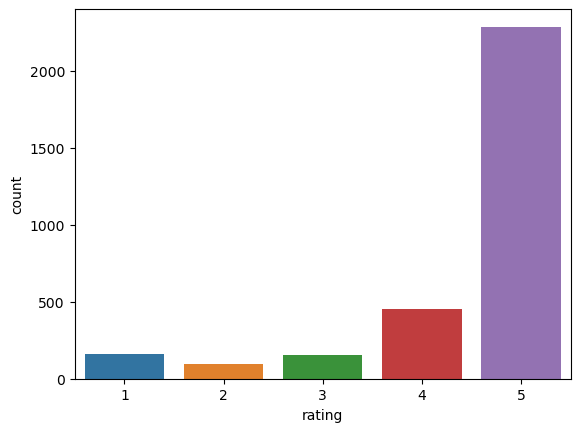

In [32]:
sns.countplot(x=df["rating"])
plt.show()

In [33]:
df["feedback"].value_counts()

1    2893
0     257
Name: feedback, dtype: int64

In [34]:

#Steps to consider:
#1) Read the dataset
#2) Remove handle null values (if any).
#3) Preprocess the Amazon Alexa reviews based on the following parameter:
#a) Tokenizing words
#b) Convert words to lower case
#c) Removing Punctuations
#d) Removing Stop words
#e) Stemming or lemmatizing the words

In [35]:
sw=stopwords.words("English")
lm=WordNetLemmatizer()

In [36]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [48]:
msg=[]
for i in df['verified_reviews'].iloc[:]:
    t=i.lower()
    t=re.sub("[^A-Ba-z0-9]"," ",t) #punctuation removallll
    t=word_tokenize(t)
    t=[i for i in t if i not in sw] #removing stopwords
    t=[lm.lemmatize(i) for i in t]
    t=" ".join(t)   #list of sentences after all preprocessing
    msg.append(t)
print(msg)

['love echo', 'loved', 'sometimes playing game answer question correctly alexa say got wrong answer like able turn light away home', 'lot fun thing 4 yr old learns dinosaur control light play game like category nice sound playing music well', 'music', 'received echo gift needed another bluetooth something play music easily accessible found smart speaker wait see else', 'without cellphone use many feature ipad see use great alarm u r almost deaf hear alarm bedroom living room reason enough keep fun ask random question hear response seem smartbon politics yet', 'think 5th one purchased working getting one every room house really like feature offer specifily playing music echo controlling light throughout house', 'look great', 'love listened song heard since childhood get news weather information great', 'sent 85 year old dad talk constantly', 'love learning knew thing eveyday still figuring everything work far easy use understand make laugh time', 'purchased mother knee problem give some

In [49]:
len(msg)

3150

In [50]:
df.shape

(3150, 5)

In [52]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

In [53]:
# Fit and transform the data
encoded_data = label_encoder.fit_transform(df['variation'])
encoded_data

array([ 5,  5, 10, ...,  1, 12,  1])

In [54]:
df['variation']=encoded_data

In [55]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,5,Love my Echo!,1
1,5,31-Jul-18,5,Loved it!,1
2,4,31-Jul-18,10,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,5,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,5,Music,1


In [ ]:
df["date"]=df["date"]

In [56]:
# Convert 'Epsilon' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   rating            3150 non-null   int64         
 1   date              3150 non-null   datetime64[ns]
 2   variation         3150 non-null   int32         
 3   verified_reviews  3150 non-null   object        
 4   feedback          3150 non-null   int64         
dtypes: datetime64[ns](1), int32(1), int64(2), object(1)
memory usage: 110.9+ KB


In [58]:
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df['Day'] = df['date'].dt.day

In [60]:
df.head()

,rating,date,variation,verified_reviews,feedback,Year,Month,Day
0,5,2018-07-31,5,Love my Echo!,1,2018,7,31
1,5,2018-07-31,5,Loved it!,1,2018,7,31
2,4,2018-07-31,10,"Sometimes while playing a game, you can answer...",1,2018,7,31
3,5,2018-07-31,5,I have had a lot of fun with this thing. My 4 ...,1,2018,7,31
4,5,2018-07-31,5,Music,1,2018,7,31


C:\Users\acer\AppData\Local\Temp\ipykernel_10084\2749875933.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

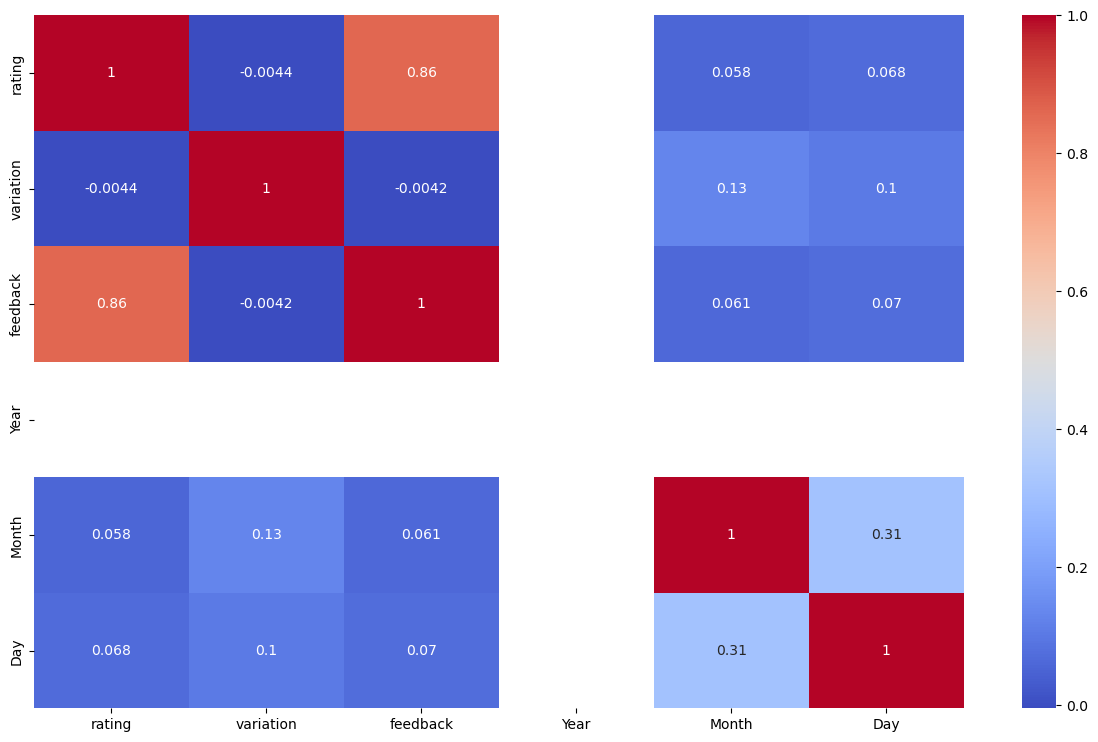

In [61]:
# Correlation Heatmap

# Computing the correlation matrix
corr = df.corr()

# Creating a figure with specified size
plt.figure(figsize=(15, 9))

# Generating the correlation heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [63]:
df['Year'].value_counts()

2018    3150
Name: Year, dtype: int64

In [64]:
df.drop("Year",axis=1,inplace=True)

In [65]:
df.drop("date",axis=1,inplace=True)

In [66]:
df.head()

,rating,variation,verified_reviews,feedback,Month,Day
0,5,5,Love my Echo!,1,7,31
1,5,5,Loved it!,1,7,31
2,4,10,"Sometimes while playing a game, you can answer...",1,7,31
3,5,5,I have had a lot of fun with this thing. My 4 ...,1,7,31
4,5,5,Music,1,7,31


C:\Users\acer\AppData\Local\Temp\ipykernel_10084\2749875933.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

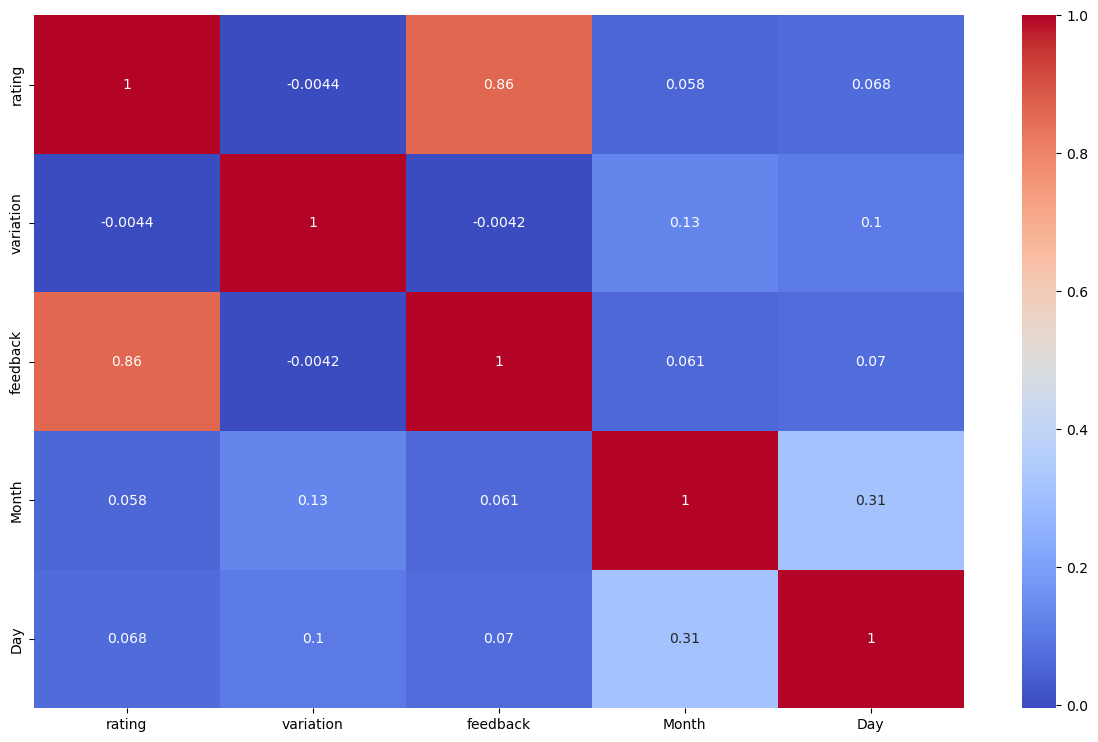

In [68]:
# Correlation Heatmap

# Computing the correlation matrix
corr = df.corr()

# Creating a figure with specified size
plt.figure(figsize=(15, 9))

# Generating the correlation heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [69]:
y=df["feedback"]
x=msg
len(x)

3150

In [96]:
cv=CountVectorizer(max_features=1500)
cv.fit(x)


CountVectorizer(max_features=1500)

In [97]:
sm1=cv.transform(x).toarray()
print(len(cv.get_feature_names_out()))#uniquewords

1500


In [98]:
sm1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [99]:
len(sm1[2000])#for any sentence- len is 1500

1500

In [100]:
len(sm1[1000])

1500

In [101]:
len(sm1[3000])

1500

In [105]:
len(sm1,),len(y)

(3150, 3150)

In [107]:
x_train,x_test,y_train,y_test=train_test_split(sm1,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2362, 1500)
(788, 1500)
(2362,)
(788,)


In [108]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)

MultinomialNB()

In [110]:
print('train score',mnb.score(x_train,y_train))
print('test score',mnb.score(x_test,y_test))

train score 0.9610499576629975
test score 0.9263959390862944


In [111]:
ypred=mnb.predict(x_test)
print(ypred)

[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [112]:
print(confusion_matrix(y_test,ypred))

[[ 28  45]
 [ 13 702]]


In [113]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.68      0.38      0.49        73
           1       0.94      0.98      0.96       715

    accuracy                           0.93       788
   macro avg       0.81      0.68      0.73       788
weighted avg       0.92      0.93      0.92       788



In [114]:
print("acc_score",accuracy_score(y_test,ypred))

acc_score 0.9263959390862944


In [120]:

def train_text_classification_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    
    return model,accuracy, report, matrix

In [121]:
model = MultinomialNB(alpha=0.1)
trained_model, accuracy, report, matrix = train_text_classification_model(model, x_train, y_train, x_test, y_test)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
print(matrix)

Accuracy: 0.9302030456852792

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.40      0.51        73
           1       0.94      0.98      0.96       715

    accuracy                           0.93       788
   macro avg       0.83      0.69      0.74       788
weighted avg       0.92      0.93      0.92       788


Confusion Matrix:
[[ 29  44]
 [ 11 704]]


In [123]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1.0)
trained_model, accuracy, report, matrix = train_text_classification_model(model, x_train, y_train, x_test, y_test)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
print(matrix)

Accuracy: 0.9390862944162437

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.48      0.59        73
           1       0.95      0.99      0.97       715

    accuracy                           0.94       788
   macro avg       0.86      0.73      0.78       788
weighted avg       0.93      0.94      0.93       788


Confusion Matrix:
[[ 35  38]
 [ 10 705]]


In [125]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=1.0)
trained_model, accuracy, report, matrix = train_text_classification_model(model, x_train, y_train, x_test, y_test)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
print(matrix)


Accuracy: 0.9263959390862944

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.27      0.41        73
           1       0.93      0.99      0.96       715

    accuracy                           0.93       788
   macro avg       0.87      0.63      0.68       788
weighted avg       0.92      0.93      0.91       788


Confusion Matrix:
[[ 20  53]
 [  5 710]]


In [126]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
trained_model, accuracy, report, matrix = train_text_classification_model(model, x_train, y_train, x_test, y_test)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
print(matrix)

Accuracy: 0.9137055837563451

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.14      0.23        73
           1       0.92      0.99      0.95       715

    accuracy                           0.91       788
   macro avg       0.79      0.56      0.59       788
weighted avg       0.90      0.91      0.89       788


Confusion Matrix:
[[ 10  63]
 [  5 710]]


In [128]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5)
trained_model, accuracy, report, matrix = train_text_classification_model(model, x_train, y_train, x_test, y_test)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
print(matrix)


Accuracy: 0.9048223350253807

Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.14      0.21        73
           1       0.92      0.98      0.95       715

    accuracy                           0.90       788
   macro avg       0.69      0.56      0.58       788
weighted avg       0.87      0.90      0.88       788


Confusion Matrix:
[[ 10  63]
 [ 12 703]]


In [130]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
trained_model, accuracy, report, matrix = train_text_classification_model(model, x_train, y_train, x_test, y_test)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
print(matrix)


Accuracy: 0.9086294416243654

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.03      0.05        73
           1       0.91      1.00      0.95       715

    accuracy                           0.91       788
   macro avg       0.79      0.51      0.50       788
weighted avg       0.89      0.91      0.87       788


Confusion Matrix:
[[  2  71]
 [  1 714]]


In [131]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001)
trained_model, accuracy, report, matrix = train_text_classification_model(model, x_train, y_train, x_test, y_test)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
print(matrix)


Accuracy: 0.9441624365482234

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.51      0.63        73
           1       0.95      0.99      0.97       715

    accuracy                           0.94       788
   macro avg       0.89      0.75      0.80       788
weighted avg       0.94      0.94      0.94       788


Confusion Matrix:
[[ 37  36]
 [  8 707]]


In [134]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
trained_model, accuracy, report, matrix = train_text_classification_model(model, x_train, y_train, x_test, y_test)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
print(matrix)


Accuracy: 0.5748730964467005

Classification Report:
              precision    recall  f1-score   support

           0       0.11      0.53      0.19        73
           1       0.92      0.58      0.71       715

    accuracy                           0.57       788
   macro avg       0.52      0.56      0.45       788
weighted avg       0.85      0.57      0.66       788


Confusion Matrix:
[[ 39  34]
 [301 414]]


In [165]:
from sklearn.svm import LinearSVC

model = LinearSVC(C=1.0)
trained_model, accuracy, report, matrix = train_text_classification_model(model, x_train, y_train, x_test, 
                                                                          y_test)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
print(matrix)


Accuracy: 0.9137055837563451

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.14      0.23        73
           1       0.92      0.99      0.95       715

    accuracy                           0.91       788
   macro avg       0.79      0.56      0.59       788
weighted avg       0.90      0.91      0.89       788


Confusion Matrix:
[[ 10  63]
 [  5 710]]


In [137]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=10)
trained_model, accuracy, report, matrix = train_text_classification_model(model, x_train, y_train, x_test, 
                                                                          y_test)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
print(matrix)


Accuracy: 0.9086294416243654

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        73
           1       0.91      1.00      0.95       715

    accuracy                           0.91       788
   macro avg       0.95      0.51      0.49       788
weighted avg       0.92      0.91      0.87       788


Confusion Matrix:
[[  1  72]
 [  0 715]]


In [140]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def train_text_classification_model(model, X_train, y_train, X_test, y_test):
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)
    
    params = {
        'max_depth': 3,
        'eta': 0.1,
        'objective': 'multi:softmax',
        'num_class': len(set(y_train)) + 1
    }
    
    model = xgb.train(params, dtrain, num_boost_round=100)
    y_pred = model.predict(dtest)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    
    return model, accuracy, report, matrix


In [141]:
import xgboost as xgb

model = None  # Define your specific XGBoost model parameters here
trained_model, accuracy, report, matrix = train_text_classification_model(model, x_train, y_train, x_test, y_test)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
print(matrix)


Accuracy: 0.9137055837563451

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.14      0.23        73
           1       0.92      0.99      0.95       715

    accuracy                           0.91       788
   macro avg       0.79      0.56      0.59       788
weighted avg       0.90      0.91      0.89       788


Confusion Matrix:
[[ 10  63]
 [  5 710]]


In [142]:
from sklearn.linear_model import PassiveAggressiveClassifier

model = PassiveAggressiveClassifier(max_iter=1000, random_state=42)
trained_model, accuracy, report, matrix = train_text_classification_model(model, x_train, y_train, x_test, y_test)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
print(matrix)


Accuracy: 0.9137055837563451

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.14      0.23        73
           1       0.92      0.99      0.95       715

    accuracy                           0.91       788
   macro avg       0.79      0.56      0.59       788
weighted avg       0.90      0.91      0.89       788


Confusion Matrix:
[[ 10  63]
 [  5 710]]


In [144]:

!pip install catboost

     -------------------------------------- 101.0/101.0 MB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB 2.3 MB/s eta 0:00:00


In [145]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, loss_function='MultiClass')
trained_model, accuracy, report, matrix = train_text_classification_model(model, x_train, y_train, x_test, y_test)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
print(matrix)


Accuracy: 0.9137055837563451

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.14      0.23        73
           1       0.92      0.99      0.95       715

    accuracy                           0.91       788
   macro avg       0.79      0.56      0.59       788
weighted avg       0.90      0.91      0.89       788


Confusion Matrix:
[[ 10  63]
 [  5 710]]


In [147]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(n_estimators=100, learning_rate=1.0)
trained_model, accuracy, report, matrix = train_text_classification_model(model, x_train, 
                                                            y_train, x_test, y_test)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
print(matrix)


Accuracy: 0.9137055837563451

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.14      0.23        73
           1       0.92      0.99      0.95       715

    accuracy                           0.91       788
   macro avg       0.79      0.56      0.59       788
weighted avg       0.90      0.91      0.89       788


Confusion Matrix:
[[ 10  63]
 [  5 710]]


In [149]:
from sklearn.svm import SVC

model = SVC(kernel='sigmoid', C=1.0)
trained_model, accuracy, report, matrix = train_text_classification_model(model, x_train, y_train
                                                                          , x_test, y_test)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
print(matrix)

Accuracy: 0.9137055837563451

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.14      0.23        73
           1       0.92      0.99      0.95       715

    accuracy                           0.91       788
   macro avg       0.79      0.56      0.59       788
weighted avg       0.90      0.91      0.89       788


Confusion Matrix:
[[ 10  63]
 [  5 710]]


In [154]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', C=1.0,gamma='auto')
trained_model, accuracy, report, matrix = train_text_classification_model(model, x_train, y_train
                                                                          , x_test, y_test)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
print(matrix)

Accuracy: 0.9137055837563451

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.14      0.23        73
           1       0.92      0.99      0.95       715

    accuracy                           0.91       788
   macro avg       0.79      0.56      0.59       788
weighted avg       0.90      0.91      0.89       788


Confusion Matrix:
[[ 10  63]
 [  5 710]]


In [153]:
from sklearn.svm import SVC

model = SVC(kernel='poly', C=1.0,gamma='auto')
trained_model, accuracy, report, matrix = train_text_classification_model(model, x_train, y_train
                                                                          , x_test, y_test)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
print(matrix)

Accuracy: 0.9137055837563451

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.14      0.23        73
           1       0.92      0.99      0.95       715

    accuracy                           0.91       788
   macro avg       0.79      0.56      0.59       788
weighted avg       0.90      0.91      0.89       788


Confusion Matrix:
[[ 10  63]
 [  5 710]]


In [152]:
from sklearn.svm import SVC

model = SVC(kernel='precomputed', C=1.0, gamma='auto')
trained_model, accuracy, report, matrix = train_text_classification_model(model, x_train, y_train
                                                                          , x_test, y_test)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
print(matrix)

Accuracy: 0.9137055837563451

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.14      0.23        73
           1       0.92      0.99      0.95       715

    accuracy                           0.91       788
   macro avg       0.79      0.56      0.59       788
weighted avg       0.90      0.91      0.89       788


Confusion Matrix:
[[ 10  63]
 [  5 710]]


In [155]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def train_text_clustering_model(model, X):
    model.fit(X)
    
    # Evaluate clustering performance using silhouette score
    silhouette_avg = silhouette_score(X, model.labels_)
    
    return model, silhouette_avg


In [156]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=42)
trained_model, silhouette_avg = train_text_clustering_model(model, X)

print("Silhouette Score:", silhouette_avg)


NameError: name 'X' is not defined

In [159]:
from sklearn.ensemble import IsolationForest
# Create an instance of the IsolationForest
model = IsolationForest()

# 
# Train the RandomizedLogisticRegression model and get the results

trained_model, accuracy, report, matrix = train_text_classification_model(model, x_train, y_train,
                                                                          x_test, y_test)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
print(matrix)

Accuracy: 0.9137055837563451

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.14      0.23        73
           1       0.92      0.99      0.95       715

    accuracy                           0.91       788
   macro avg       0.79      0.56      0.59       788
weighted avg       0.90      0.91      0.89       788


Confusion Matrix:
[[ 10  63]
 [  5 710]]


In [162]:
# Create an instance of the GaussianMixture model
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = GaussianMixture(n_components=2, random_state=42)

# Train the GaussianMixture model and get the results
trained_model, accuracy, report, matrix = train_text_classification_model(model, x_train, y_train,
                                                                          x_test, y_test)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
print(matrix)

Accuracy: 0.9137055837563451

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.14      0.23        73
           1       0.92      0.99      0.95       715

    accuracy                           0.91       788
   macro avg       0.79      0.56      0.59       788
weighted avg       0.90      0.91      0.89       788


Confusion Matrix:
[[ 10  63]
 [  5 710]]


In [163]:
1+2

3